In [214]:
import pandas as pd
import networkx as nx
import numpy as np

## Background

This project focuses on creating and analysing a graph database of Chicago’s criminal occurrences during the
year 2001 to present. In particular I will be playing close attention to the type of crime (theft, narcotics
etc.) and the type of location (Street, gas station, school, etc.) it occurred in.

Link to data: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [215]:
# parsing CSV
records = pd.read_csv("Crimes_-_2001_to_present.csv",nrows=500)

In [216]:
# snapshot of records
records

,﻿ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2082674,HH289429,04/06/2002 01:29:30 PM,056XX S CARPENTER ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,NaN,NaN,18,1170274,1867500,2002,04/15/2016 08:55:02 AM,41.791908,-87.651170,"(41.791908395, -87.651170238)"
1,2082678,HH308017,04/15/2002 07:24:00 AM,024XX S ARCHER AV,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,1171590,1887793,2002,04/15/2016 08:55:02 AM,41.847566,-87.645749,"(41.847565598, -87.645749253)"
2,2082679,HH307385,04/14/2002 06:31:22 PM,112XX S WALLACE ST,1330,CRIMINAL TRESPASS,TO LAND,"SCHOOL, PUBLIC, BUILDING",False,False,...,NaN,NaN,26,1174313,1830380,2002,04/15/2016 08:55:02 AM,41.689957,-87.637461,"(41.68995741, -87.637460623)"
3,2154682,HH400487,05/27/2002 08:45:00 PM,029XX N KIMBALL AVE,0460,BATTERY,SIMPLE,STREET,True,False,...,35,21,08B,NaN,NaN,2002,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,2082680,HH307614,04/14/2002 11:20:00 PM,048XX N LAWNDALE AV,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,NaN,NaN,04A,1150850,1931842,2002,04/15/2016 08:55:02 AM,41.968871,-87.720711,"(41.96887071, -87.720711123)"
5,2082683,HH309373,04/14/2002 04:30:00 PM,056XX N WASHTENAW AV,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,NaN,NaN,05,1157276,1937575,2002,04/15/2016 08:55:02 AM,41.984474,-87.696926,"(41.98447383, -87.696926181)"
6,2082685,HH308412,04/15/2002 11:20:12 AM,013XX E 47 ST,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,NaN,08A,1185692,1874100,2002,04/15/2016 08:55:02 AM,41.809670,-87.594428,"(41.809669669, -87.594427666)"
7,2082686,HH301231,04/11/2002 08:35:00 PM,002XX S LOTUS AV,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,STREET,True,False,...,NaN,NaN,26,1139911,1898709,2002,04/15/2016 08:55:02 AM,41.878158,-87.761746,"(41.878157774, -87.761746134)"
8,2082687,HH309013,04/15/2002 03:15:00 PM,045XX S DAMEN AV,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,False,...,NaN,NaN,06,1163663,1874311,2002,04/15/2016 08:55:02 AM,41.810740,-87.675220,"(41.810740003, -87.675220451)"
9,2082688,HH306526,04/09/2002 02:00:00 AM,048XX N WINTHROP AV,0820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,NaN,06,1167994,1932485,2002,04/15/2016 08:55:02 AM,41.970281,-87.657655,"(41.970281428, -87.657654526)"


## Data wrangling

In [217]:
# adding code friendly column names
records.columns = ['ID', 'case_number', 'date', 'block', 'iucr',
       'primary_type', 'description', 'location_description', 'arrest',
       'domestic', 'beat', 'district', 'ward', 'community_area',
       'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on',
       'latitude', 'longitude', 'location']

In [218]:
#create DataFrame of unique location descriptions
locations = records.location_description.unique()
locations = pd.DataFrame(locations,columns=['location_description'])
# create unique Id for location description
locations['ID'] = range(7000000,7000000+len(locations))
locations

,location_description,ID
0,STREET,7000000
1,GAS STATION,7000001
2,"SCHOOL, PUBLIC, BUILDING",7000002
3,APARTMENT,7000003
4,PARKING LOT/GARAGE(NON.RESID.),7000004
5,SMALL RETAIL STORE,7000005
6,RESIDENCE-GARAGE,7000006
7,RESIDENCE,7000007
8,SIDEWALK,7000008
9,DRUG STORE,7000009


In [219]:
# slice dataset to only include values needed
n = records.loc[:,['ID','case_number','block','primary_type','location_description']]
# merge the crime dataset and location Ids
t = pd.merge(n,locations,on="location_description")
t

,ID_x,case_number,block,primary_type,location_description,ID_y
0,2082674,HH289429,056XX S CARPENTER ST,NARCOTICS,STREET,7000000
1,2154682,HH400487,029XX N KIMBALL AVE,BATTERY,STREET,7000000
2,2082680,HH307614,048XX N LAWNDALE AV,ASSAULT,STREET,7000000
3,2082686,HH301231,002XX S LOTUS AV,NARCOTICS,STREET,7000000
4,2082688,HH306526,048XX N WINTHROP AV,THEFT,STREET,7000000
5,2082690,HH298233,066XX S OAKLEY AV,NARCOTICS,STREET,7000000
6,2082695,HH300139,012XX S ALBANY AV,MOTOR VEHICLE THEFT,STREET,7000000
7,21547,HX417437,015XX S LAWNDALE AVE,HOMICIDE,STREET,7000000
8,2082708,HH308298,042XX S ROCKWELL ST,THEFT,STREET,7000000
9,2082716,HH307878,033XX W HUTCHINSON ST,OTHER OFFENSE,STREET,7000000


In [220]:
# create relation list between each case and the location of the occurrence
egdeList =  t.loc[:,['ID_x','ID_y','primary_type']]

In [221]:
egdeList

,ID_x,ID_y,primary_type
0,2082674,7000000,NARCOTICS
1,2154682,7000000,BATTERY
2,2082680,7000000,ASSAULT
3,2082686,7000000,NARCOTICS
4,2082688,7000000,THEFT
5,2082690,7000000,NARCOTICS
6,2082695,7000000,MOTOR VEHICLE THEFT
7,21547,7000000,HOMICIDE
8,2082708,7000000,THEFT
9,2082716,7000000,OTHER OFFENSE


## Graphing

In [222]:
# create Nodes
G = nx.Graph()

In [223]:
# create occurrence nodes
for index, row in t.iterrows():
    G.add_node(row['ID_x'],case_number=row['case_number'],block=row['block'],location='')

In [224]:
# create Location Nodes
for index, row in locations.iterrows():
     G.add_node(row['ID'],location=row['location_description'],case_number='',block='')

In [225]:
#create Edges
for index, row in egdeList.iterrows():
    G.add_edge(row['ID_x'],row['ID_y'],relation = row['primary_type'])

In [226]:
# create primary_type edges
# this will link similar occurrences
for record in records.primary_type.unique():
    ids = records.loc[records['primary_type'] == record].ID
    if(len(ids) > 1):
        for val in ids:
            # get other items to create edgeList
            e = [t for t in ids  if t != val]
            # create edge
            for relation in e:
                G.add_edge(val,relation,relation = record)


In [227]:
%matplotlib inline
import matplotlib.pyplot as plt

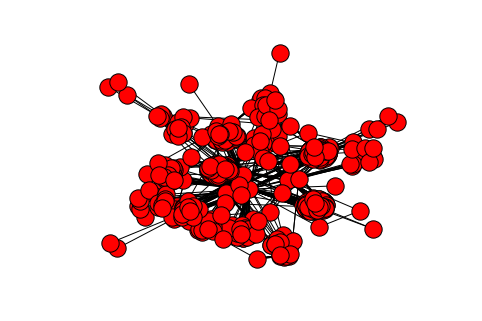

In [228]:
# draw Graph
nx.draw(G)
plt.show() 

In [237]:
# get Node Identifier from ID
def getNodIdentifier(nodeID):
    if(nodeID >= 7000000 and nodeID < 8000000):
        c = locations.loc[locations['ID'] == nodeID]
        return(c['location_description'].item())       
    else:
        c = n.loc[n['ID'] == nodeID]
        return(c['case_number'].item())
        

In [242]:
# degree of graph
dg = nx.degree(G)
for key, value in dg.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value

STREET - 182
GAS STATION - 4
SCHOOL, PUBLIC, BUILDING - 11
APARTMENT - 37
PARKING LOT/GARAGE(NON.RESID.) - 11
SMALL RETAIL STORE - 11
RESIDENCE-GARAGE - 9
RESIDENCE - 59
SIDEWALK - 54
DRUG STORE - 2
OTHER - 20
CHA APARTMENT - 7
GROCERY FOOD STORE - 9
BAR OR TAVERN - 3
PARK PROPERTY - 5
FACTORY/MANUFACTURING BUILDING - 3
CURRENCY EXCHANGE - 1
BANK - 3
COMMERCIAL / BUSINESS OFFICE - 3
CHA PARKING LOT/GROUNDS - 10
ALLEY - 11
RESTAURANT - 7
RESIDENCE PORCH/HALLWAY - 8
DEPARTMENT STORE - 9
CHA HALLWAY/STAIRWELL/ELEVATOR - 5
CTA PLATFORM - 2
VEHICLE-COMMERCIAL - 1
VEHICLE NON-COMMERCIAL - 2
TAVERN/LIQUOR STORE - 2
OTHER RAILROAD PROP / TRAIN DEPOT - 1
GOVERNMENT BUILDING/PROPERTY - 3
MEDICAL/DENTAL OFFICE - 1
HOTEL/MOTEL - 1
CONSTRUCTION SITE - 1
DAY CARE CENTER - 1
DRIVEWAY - RESIDENTIAL - 1


## Degree centrality for each node

In [238]:
# compute degree centrality
dc = nx.degree(G)
for key, value in dc.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value

STREET - 182
GAS STATION - 4
SCHOOL, PUBLIC, BUILDING - 11
APARTMENT - 37
PARKING LOT/GARAGE(NON.RESID.) - 11
SMALL RETAIL STORE - 11
RESIDENCE-GARAGE - 9
RESIDENCE - 59
SIDEWALK - 54
DRUG STORE - 2
OTHER - 20
CHA APARTMENT - 7
GROCERY FOOD STORE - 9
BAR OR TAVERN - 3
PARK PROPERTY - 5
FACTORY/MANUFACTURING BUILDING - 3
CURRENCY EXCHANGE - 1
BANK - 3
COMMERCIAL / BUSINESS OFFICE - 3
CHA PARKING LOT/GROUNDS - 10
ALLEY - 11
RESTAURANT - 7
RESIDENCE PORCH/HALLWAY - 8
DEPARTMENT STORE - 9
CHA HALLWAY/STAIRWELL/ELEVATOR - 5
CTA PLATFORM - 2
VEHICLE-COMMERCIAL - 1
VEHICLE NON-COMMERCIAL - 2
TAVERN/LIQUOR STORE - 2
OTHER RAILROAD PROP / TRAIN DEPOT - 1
GOVERNMENT BUILDING/PROPERTY - 3
MEDICAL/DENTAL OFFICE - 1
HOTEL/MOTEL - 1
CONSTRUCTION SITE - 1
DAY CARE CENTER - 1
DRIVEWAY - RESIDENTIAL - 1


## Eigenvector centrality for each node

In [239]:
ec = nx.eigenvector_centrality(G)
for key, value in ec.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value

STREET - 0.0500528118112
GAS STATION - 3.44334145587e-05
SCHOOL, PUBLIC, BUILDING - 0.00232671134996
APARTMENT - 0.00131297153805
PARKING LOT/GARAGE(NON.RESID.) - 0.0011778615186
SMALL RETAIL STORE - 8.56441677248e-05
RESIDENCE-GARAGE - 1.87299691857e-06
RESIDENCE - 0.00608985530592
SIDEWALK - 0.0272756891308
DRUG STORE - 3.28651144129e-05
OTHER - 0.00125963770617
CHA APARTMENT - 5.67558343014e-05
GROCERY FOOD STORE - 9.91759754963e-05
BAR OR TAVERN - 3.4144490223e-05
PARK PROPERTY - 0.00113484117318
FACTORY/MANUFACTURING BUILDING - 1.80609167546e-05
CURRENCY EXCHANGE - 2.5719599823e-07
BANK - 2.18223858191e-06
COMMERCIAL / BUSINESS OFFICE - 3.31262207284e-05
CHA PARKING LOT/GROUNDS - 0.00562938968752
ALLEY - 0.00785260814214
RESTAURANT - 5.31308104865e-05
RESIDENCE PORCH/HALLWAY - 0.00118796925273
DEPARTMENT STORE - 0.00014801439304
CHA HALLWAY/STAIRWELL/ELEVATOR - 2.07609869723e-06
CTA PLATFORM - 5.14451744438e-07
VEHICLE-COMMERCIAL - 2.5719599823e-07
VEHICLE NON-COMMERCIAL - 0.00223

## Compare centrality measures across categorical groups

## Degree centrality

In [240]:
# select category items
for key, value in dc.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value

STREET - 182
GAS STATION - 4
SCHOOL, PUBLIC, BUILDING - 11
APARTMENT - 37
PARKING LOT/GARAGE(NON.RESID.) - 11
SMALL RETAIL STORE - 11
RESIDENCE-GARAGE - 9
RESIDENCE - 59
SIDEWALK - 54
DRUG STORE - 2
OTHER - 20
CHA APARTMENT - 7
GROCERY FOOD STORE - 9
BAR OR TAVERN - 3
PARK PROPERTY - 5
FACTORY/MANUFACTURING BUILDING - 3
CURRENCY EXCHANGE - 1
BANK - 3
COMMERCIAL / BUSINESS OFFICE - 3
CHA PARKING LOT/GROUNDS - 10
ALLEY - 11
RESTAURANT - 7
RESIDENCE PORCH/HALLWAY - 8
DEPARTMENT STORE - 9
CHA HALLWAY/STAIRWELL/ELEVATOR - 5
CTA PLATFORM - 2
VEHICLE-COMMERCIAL - 1
VEHICLE NON-COMMERCIAL - 2
TAVERN/LIQUOR STORE - 2
OTHER RAILROAD PROP / TRAIN DEPOT - 1
GOVERNMENT BUILDING/PROPERTY - 3
MEDICAL/DENTAL OFFICE - 1
HOTEL/MOTEL - 1
CONSTRUCTION SITE - 1
DAY CARE CENTER - 1
DRIVEWAY - RESIDENTIAL - 1


In [209]:
# select category items
for key, value in 3c.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value

## eigenvector centrality

In [212]:

# select category items
for key, value in x.items():
    if(key >= 7000000 and key < 8000000):
        print getNodeCategoryName(key),'-', value
    

STREET - 0.542046605876
GAS STATION - 0.274499743458
SCHOOL, PUBLIC, BUILDING - 0.312135355893
APARTMENT - 0.435667752443
PARKING LOT/GARAGE(NON.RESID.) - 0.39309331374
SMALL RETAIL STORE - 0.335213032581
RESIDENCE-GARAGE - 0.246316758748
RESIDENCE - 0.465217391304
SIDEWALK - 0.381597717546
DRUG STORE - 0.264458724666
OTHER - 0.387400434468
CHA APARTMENT - 0.291553133515
GROCERY FOOD STORE - 0.282919090428
BAR OR TAVERN - 0.296892341842
PARK PROPERTY - 0.298382598996
FACTORY/MANUFACTURING BUILDING - 0.290130151844
CURRENCY EXCHANGE - 0.23030563926
BANK - 0.259079903148
COMMERCIAL / BUSINESS OFFICE - 0.271435819381
CHA PARKING LOT/GROUNDS - 0.35290237467
ALLEY - 0.315634218289
RESTAURANT - 0.33004318322
RESIDENCE PORCH/HALLWAY - 0.359060402685
DEPARTMENT STORE - 0.265376984127
CHA HALLWAY/STAIRWELL/ELEVATOR - 0.251409774436
CTA PLATFORM - 0.230404823428
VEHICLE-COMMERCIAL - 0.23030563926
VEHICLE NON-COMMERCIAL - 0.257335257335
TAVERN/LIQUOR STORE - 0.264458724666
OTHER RAILROAD PROP / T